<a href="https://colab.research.google.com/github/nikitin712/project2_classifier_of_fraud/blob/main/Classifier_of_fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/data

Рассмотрим датасет с kaggle, содержащий информацию о кредитных карточках и операциях. Есть два класса: 0 - обычная операция, 1 - мошенничество. Необходимо по данным определять, связана ли операция с мошенничеством или нет. Для этого попробую применить методы Машинного обучения, узнаю какая модель будет самой лучшей по 4 метрикам accuracy, precision, recall, f1.

In [4]:
df = pd.read_csv('creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


Столбцы с названиями V1-V28 получены путем применения метода опорных векторов к исходным данным. Найдем наиболее и наименее информативные признаки.

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

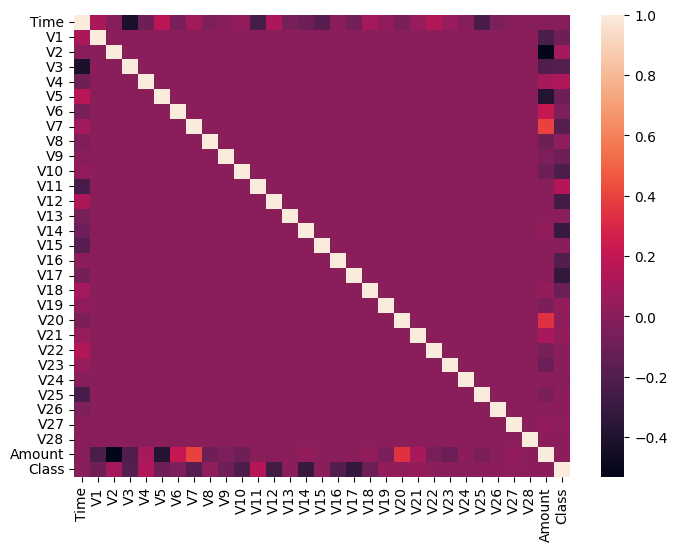

In [7]:
correlation_matrix = df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix)
plt.show()

Из матрицы корреляции признаков видим, что многие признаки никак не коррелируют с целевым признаком class, удалю их.

In [8]:
df.drop(columns=['V1', 'V13', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28'], inplace=True)

In [9]:
df['Class'].value_counts()

,count
Class,
0,284315
1,492


Присутствует сильный дисбаланс классов. Мошеннических операций во много раз меньше, чем обычных. Для обучения уменьшу размер выборки для обучения. Для сравнения моделей буду опираться в основном на метрики precision, recall, f1.

In [10]:
class_1 = df[df['Class'] == 1]
class_0 = df[df['Class'] == 0]

class_0 = class_0.sample(frac=0.5, random_state=42)

df_new = pd.concat([class_0, class_1])
df_new = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [11]:
df_new

,Time,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V14,V15,V16,V17,V18,Amount,Class
0,41505.0,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,-14.110184,5.299236,-10.834006,-9.373859,0.360806,-9.899247,-19.236292,-8.398552,364.19,1
1,44261.0,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,0.899746,-0.565012,-0.087670,0.979427,-0.217884,-0.136830,-2.142892,0.126956,1.752662,520.12,0
2,35484.0,-0.590701,0.168619,-1.029950,-0.539806,0.040444,-0.712567,0.002299,-0.971747,0.756801,0.543827,0.112453,-0.245772,0.180483,1.769860,-0.533172,-0.533300,31.00,0
3,167123.0,1.647895,-1.669361,-0.349504,0.785785,-0.630647,0.276990,0.586025,-0.484715,-1.376648,-1.328335,0.223621,-0.550875,0.616568,0.497974,0.502195,0.981343,1.50,0
4,168473.0,-0.137394,-1.015839,0.327269,-0.182179,-0.956571,0.043241,-0.160746,0.363241,0.259452,0.942162,0.850038,0.592634,-0.603845,0.091077,-0.471867,-0.333816,0.89,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,75618.0,0.100792,0.490512,0.461596,-0.296377,-0.213165,-0.165254,0.119221,-0.114199,0.079128,1.585195,0.777009,0.600937,0.658885,0.239566,-0.356782,-0.410923,1.98,0
284803,159000.0,0.144023,-1.142399,-1.241113,1.940358,3.912076,-0.466107,1.360620,0.400697,-0.654029,-0.421422,0.346437,0.384625,0.785702,0.057999,-0.462528,-0.063197,89.23,0
284804,79795.0,0.992946,1.524591,0.485774,0.349308,-0.815198,1.076640,-0.395316,-0.491303,-0.212753,-0.382362,0.022804,-0.019493,0.690200,-0.144778,-0.539887,-0.068375,3.94,0
284805,87931.0,2.354849,-2.521201,-3.798905,1.866302,2.727695,-0.471769,2.217537,0.580199,-0.027572,-0.418939,0.570400,0.927786,-0.090065,0.426113,-0.396148,-0.946837,1.00,0


In [12]:
y = df_new['Class']
df_new.drop(columns=['Class'], inplace=True)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(df_new, y, test_size = 0.3)

In [14]:
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

In [15]:
for name, model in models.items():
    classif = model
    classif.fit(X_train, y_train)

    y_pred = classif.predict(X_test)

    print(f'{name}')
    print(f'Acc {accuracy_score(y_test, y_pred)}')
    print(f'Pre {precision_score(y_test, y_pred)}')
    print(f'Recc {recall_score(y_test, y_pred)}')
    print(f'F1 {f1_score(y_test, y_pred)}')
    print('-' * 100)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression
Acc 0.9990637032875719
Pre 0.7441860465116279
Recc 0.7804878048780488
F1 0.7619047619047619
----------------------------------------------------------------------------------------------------
Decision Tree
Acc 0.9991222218320986
Pre 0.7664670658682635
Recc 0.7804878048780488
F1 0.7734138972809668
----------------------------------------------------------------------------------------------------


Наилучшие показатели у модели Decision Tree. Посмотрю как он работает со всей выборкой.

In [16]:
classif = DecisionTreeClassifier(random_state=42)
classif.fit(X_train, y_train)

y_pred = classif.predict(X_test)

print(f'Acc {accuracy_score(y_test, y_pred)}')
print(f'Pre {precision_score(y_test, y_pred)}')
print(f'Recc {recall_score(y_test, y_pred)}')
print(f'F1 {f1_score(y_test, y_pred)}')


Acc 0.9991222218320986
Pre 0.7664670658682635
Recc 0.7804878048780488
F1 0.7734138972809668


In [17]:
y = df['Class']
df.drop(columns=['Class'], inplace=True)

y_pred = classif.predict(df)
print(f'Acc {accuracy_score(y, y_pred)}')
print(f'Pre {precision_score(y, y_pred)}')
print(f'Recc {recall_score(y, y_pred)}')
print(f'F1 {f1_score(y, y_pred)}')

Acc 0.9997366637758202
Pre 0.9212121212121213
Recc 0.926829268292683
F1 0.9240121580547113


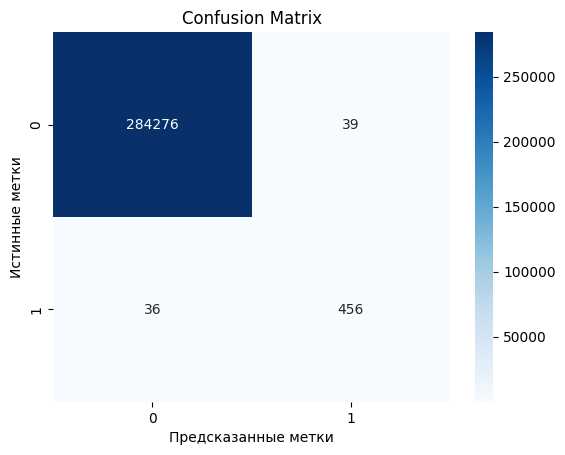

In [19]:
sns.heatmap(confusion_matrix(y, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Предсказанные метки')
plt.ylabel('Истинные метки')
plt.title('Confusion Matrix')
plt.show()

Несмотря на сильный дисбаланс классов, модель достаточно хорошо предсказывает мошенничество. Ее можно использовать в проде.